# KF algorithm and parameter investigation
## Summary of investigation target and results

1. Flat floor issue
1. Locking the foot on the floor (z or x, y, z) during the constraint update 
1. How much change does setting pelvis = ankle average speed or position during the measurement update do?
1. Compare W=P^-1, W=I, and W=P^-1 but increasing knee angle only

Note: see details below

In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode()

Data Processing (dataframe)

In [2]:
def get_action_type(s):
    return s.split('-')[-2]

In [3]:
result_mat_path = '../neura-sparse01/explore-v2/results20190207.csv'
summary_output_path = '../neura-sparse01/explore-v2/summary.csv'

df = pd.read_csv(result_mat_path)
df['type'] = df['name'].apply(lambda s: s.split('-')[-2])

df['anklePosMean'] = np.mean(df[['LTIO_1', 'LTIO_2', 'LTIO_3', 'RTIO_1', 'RTIO_2', 'RTIO_3']], axis=1)
df['anklePosStd'] = np.mean(df[['LTIOStd_1', 'LTIOStd_2', 'LTIOStd_3', 'RTIOStd_1', 'RTIOStd_2', 'RTIOStd_3']], axis=1)
df['ankleLPosMean'] = np.mean(df[['LTIO_1', 'LTIO_2', 'LTIO_3']], axis=1)
df['ankleLPosStd'] = np.mean(df[['LTIOStd_1', 'LTIOStd_2', 'LTIOStd_3']], axis=1)
df['ankleRPosMean'] = np.mean(df[['RTIO_1', 'RTIO_2', 'RTIO_3']], axis=1)
df['ankleRPosStd'] = np.mean(df[['RTIOStd_1', 'RTIOStd_2', 'RTIOStd_3']], axis=1)
df['kneePosMean'] = np.mean(df[['LFEO_1', 'LFEO_2', 'LFEO_3', 'RFEO_1', 'RFEO_2', 'RFEO_3']], axis=1)
df['kneePosStd'] = np.mean(df[['LFEOStd_1', 'LFEOStd_2', 'LFEOStd_3', 'RFEOStd_1', 'RFEOStd_2', 'RFEOStd_3']], axis=1)
df['kneeOriYMean'] = np.mean(df[['qLKNE_2', 'qRKNE_2']], axis=1)
df['kneeOriYStd'] = np.mean(df[['qLKNEStd_2', 'qRKNEStd_2']], axis=1)
df['kneeLOriYMean'] = np.mean(df[['qLKNE_2']], axis=1)
df['kneeLOriYStd'] = np.mean(df[['qLKNEStd_2']], axis=1)
df['kneeROriYMean'] = np.mean(df[['qRKNE_2']], axis=1)
df['kneeROriYStd'] = np.mean(df[['qRKNEStd_2']], axis=1)
df['hipOriXMean'] = np.mean(df[['qLHIP_1', 'qRHIP_1']], axis=1)
df['hipOriXStd'] = np.mean(df[['qLHIPStd_1', 'qRHIPStd_1']], axis=1)
df['hipOriYMean'] = np.mean(df[['qLHIP_2', 'qRHIP_2']], axis=1)
df['hipOriYStd'] = np.mean(df[['qLHIPStd_2', 'qRHIPStd_2']], axis=1)
df['hipOriZMean'] = np.mean(df[['qLHIP_3', 'qRHIP_3']], axis=1)
df['hipOriZStd'] = np.mean(df[['qLHIPStd_3', 'qRHIPStd_3']], axis=1)
df['hipOriMean'] = np.mean(df[['qLHIP_1', 'qRHIP_1', 'qLHIP_2', 'qRHIP_2', 'qLHIP_3', 'qRHIP_3']], axis=1)
df['hipOriStd'] = np.mean(df[['qLHIPStd_1', 'qRHIPStd_1', 'qLHIPStd_2', 'qRHIPStd_2', 'qLHIPStd_3', 'qRHIPStd_3']], axis=1)

idx = df['anklePosMean'] > 10
df.loc[idx, :] = np.nan

df_result = df.groupby(['type', 'label']).mean()
df_result2 = df.groupby(['type', 'label']).std()

df_result['runtimeMean'] = df_result['runtime']
df_result['runtimeStd'] = df_result2['runtime']
df_result['dOriMean'] = df_result['dOri']
df_result['dOriStd'] = df_result2['dOri']
df_result['dPosMean'] = df_result['dPos']
df_result['dPosStd'] = df_result2['dPos']

df_result.to_csv(summary_output_path)

In [4]:
df.to_csv('../neura-sparse01/explore-v2/results20190207-2.csv')

In [5]:
df_result.head()

posMeanRMSE  oriMeanRMSE  \
type          label                                                          
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171     0.211692    31.568539   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172     0.045067    13.693521   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173     0.137977    30.880864   
              NS1+Av__sOv__sIv__v+Sav01+M02+C174     0.045069    13.694513   
              NS1+Av__sOv__sIv__v+Sav01+M02+C175     0.041446    13.052329   

                                                  MIDPEL_1  MIDPEL_2  \
type          label                                                    
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171       0.0       0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172       0.0       0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173       0.0       0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C174       0.0       0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C175       0.0       0.0   

                                                  MIDPEL_3  MIDPELStd_1  \
type          label                                                       
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171       0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172       0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173       0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C174       0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C175       0.0          0.0   

                                                  MIDPELStd_2  MIDPELStd_3  \
type          label                                                          
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171          0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172          0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173          0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C174          0.0          0.0   
              NS1+Av__sOv__sIv__v+Sav01+M02+C175          0.0          0.0   

                                                    LFEP_1    LFEP_2  \
type          label                                                    
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171  0.003304  0.003102   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172  0.003304  0.003102   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173  0.003304  0.003102   
              NS1+Av__sOv__sIv__v+Sav01+M02+C174  0.003304  0.003102   
              NS1+Av__sOv__sIv__v+Sav01+M02+C175  0.003304  0.003102   

                                                    ...     hipOriZMean  \
type          label                                 ...                   
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171    ...       22.506887   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172    ...       18.792922   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173    ...       22.413173   
              NS1+Av__sOv__sIv__v+Sav01+M02+C174    ...       18.793098   
              NS1+Av__sOv__sIv__v+Sav01+M02+C175    ...       18.990381   

                                                  hipOriZStd  hipOriMean  \
type          label                                                        
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171   18.114967   39.397755   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172   15.126270   15.603181   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173   18.016378   38.470326   
              NS1+Av__sOv__sIv__v+Sav01+M02+C174   15.126631   15.604779   
              NS1+Av__sOv__sIv__v+Sav01+M02+C175   15.125991   14.971004   

                                                  hipOriStd  runtimeMean  \
type          label                                                        
FigureofEight NS1+Av__sOv__sIv__v+Sav01+M02+C171  24.844540     6.435937   
              NS1+Av__sOv__sIv__v+Sav01+M02+C172  13.046499    17.515625   
              NS1+Av__sOv__sIv__v+Sav01+M02+C173  24.7298

Graph report functions

In [6]:
def plot_results(df_result, traces_name, target, title='', ylabel='rmse (m)', xTypes = []):
    traces = []
    for k in traces_name:
        v = traces_name[k]
        idx = (df_result.index.get_level_values('label') == v)
        
        df_buf = df_result.iloc[idx].reset_index(level='label')
        if len(xTypes) == 0:
            xTypes = df_buf['{}Mean'.format(target)].index.get_level_values('type').values
        df_buf2 = df_buf.loc[xTypes]
    
        trace = go.Bar(
            x=xTypes,
            y=df_buf2['{}Mean'.format(target)].values,
            name=k,
            error_y=dict(
                type='data',
                array=df_buf2['{}Std'.format(target)].values,
                visible=True
            )
        )
        traces.append(trace)

    layout = go.Layout(
        title=title,
        xaxis=dict(
            title='Types of motion',
        ),
        yaxis=dict(
            title=ylabel,
        ),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))

In [7]:
def plot_results2(df_result, traces_name, targets, title='', ylabel='rmse (m)', xTypes = []):
    traces = []
    for k in traces_name:
        for l in targets:
            v = traces_name[k]
            target = targets[l]
            idx = (df_result.index.get_level_values('label') == v)

            df_buf = df_result.iloc[idx].reset_index(level='label')
            if len(xTypes) == 0:
                xTypes = df_buf['{}Mean'.format(target)].index.get_level_values('type').values
            df_buf2 = df_buf.loc[xTypes]

            trace = go.Bar(
                x=xTypes,
                y=df_buf2['{}Mean'.format(target)].values,
                name='{} {}'.format(k, l),
                error_y=dict(
                    type='data',
                    array=df_buf2['{}Std'.format(target)].values,
                    visible=True
                )
            )
            traces.append(trace)

    layout = go.Layout(
        title=title,
        xaxis=dict(
            title='Types of motion',
        ),
        yaxis=dict(
            title=ylabel,
        ),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))

In [8]:
xTypes = ['Static', 'Walk', 'FigureofEight', 'Zigzag', 'Fivemin', 'Jog', 'JumpingJacks', 'SpeedSkater', 'HighKneeJog']

## 1. Not so flat floor
The floor on the benchmark recording (Vicon) is not as flat as hoped to be. In the vicon frame, there is around 5 mm discrepancy depending on different x and y. In the world frame, there is around 2 mm discrepancy. 

To ensure that the flat floor assumption is as accurate as it can be, the comparison from here on out will be done in the world frame. Note that results up until now has been in the Vicon frame. The plot results below show that the vicon frame and world frame results are quite similar.

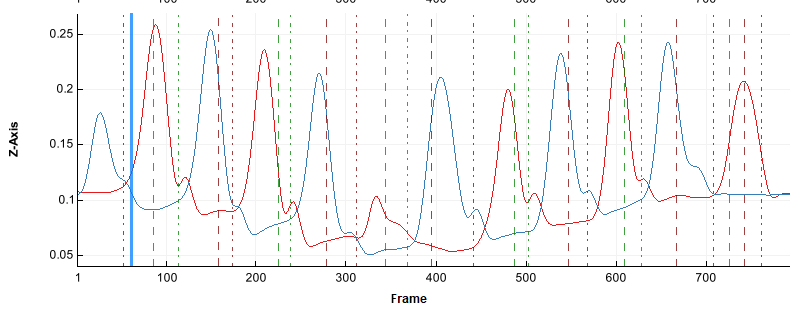
Figure: z position of left and right ankle obtained from the Vicon system in the Vicon frame
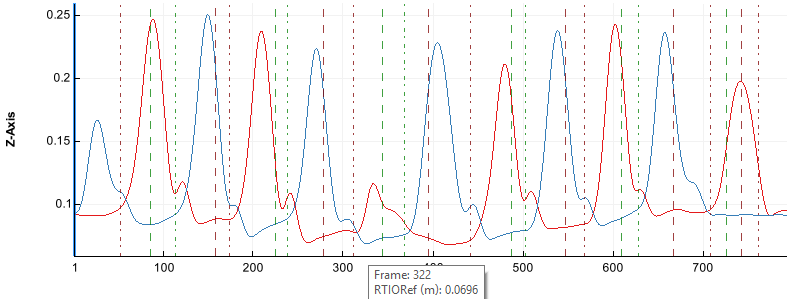
Figure: z position of left and right ankle obtained from the Vicon system in the World frame

In [9]:
traces_name = {'vicon frame': 'NS1+Av__sOv__sIv__v+Sav01+M66+C393',
               'world frame': 'NS1+Aw__sOw__sIw__v+Sav01+M66+C393'}

In [10]:
plot_results(df_result, traces_name, 'anklePos', xTypes=xTypes)

Figure: Ankle position error of trials in vicon or world frame under configuration pelvis z = init z pos, pelvis x y pos = ankle average x y pos (M66) and W=I but zero for ankle position during foot step (C393)

In [11]:
plot_results(df_result, traces_name, 'kneeOriY', ylabel='rmse (deg)', xTypes=xTypes)

Figure: Knee angle error of trials in vicon or world frame under configuration pelvis z = init z pos, pelvis x y pos = ankle average x y pos (M66) and W=I but zero for ankle position during foot step (C393)

## 2. Below flat floor correction
When the foot is detected below the floor and not stepping, the measurement update OR constraint update (W=inv(P)) corrects it by adding a large z velocity on the ankles causing it to fly up towards the pelvis. Obviously, this should not be the case. 

As a simple solution, simply remove the below flat floor correction if not stepping, and trust the correction during step detection will be enough (it is actually enough for my trials). This way, the estimator will not need to overcompensate. The plot results below (after the gif images) shows that not doing the below floor correction during measurement update does improve position and orientation estimates.

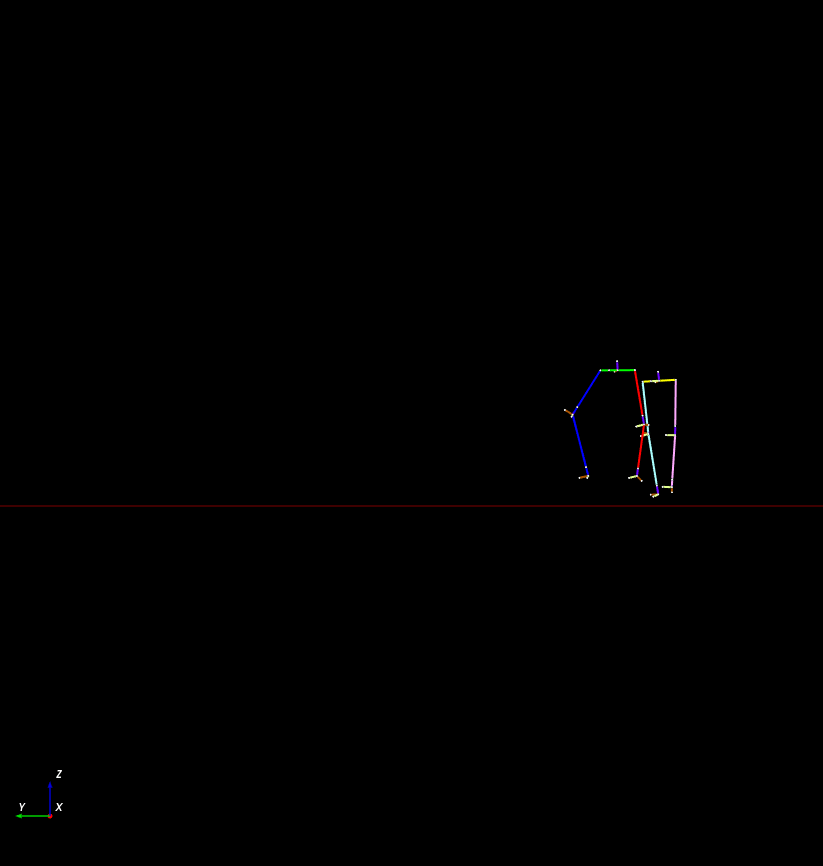
Figure: Effect of below the floor correction during measurement update that makes the ankle fly towards the pelvis

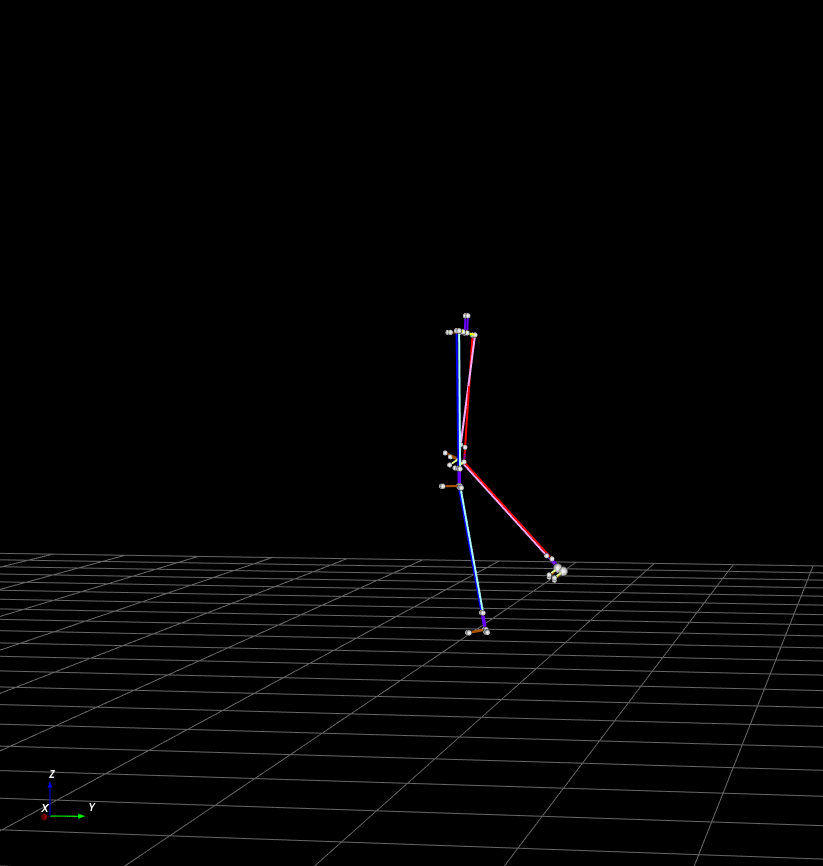
Figure: Effect of below the floor correction during constraint update (W=inv(P)) that makes the person seem to jump / trip over.

In [12]:
traces_name = {'w/ below floor correction (meas, set zpos=floor)': 'NS1+Aw__sOw__sIw__v+Sav01+M56+C393', #C355 is unstable
               'w/ below floor correction (meas, set zpos=floor and zero vel)': 'NS1+Aw__sOw__sIw__v+Sav01+M86+C355',
               'w/ below floor correction (cstr)': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C375',
               'w/out below floor correction': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C355'}

In [13]:
plot_results(df_result, traces_name, 'anklePos', xTypes=xTypes)

Figure: Ankle position error of trials with or without below floor correction during measurement update. Other algorithm configuration includes pelvis z = init z pos, pelvis x y pos = ankle average x y pos (M56 or M76). Note that w/ below floor correction (meas) used W=I constraint as W=inv(P) for that measurement update configuration is numerically unstable.

In [14]:
plot_results(df_result, traces_name, 'kneeOriY', ylabel='rmse (deg)', xTypes=xTypes)

Figure: Knee angle error of trials with or without below floor correction during measurement update. Other algorithm configuration includes pelvis z = init z pos, pelvis x y pos = ankle average x y pos (M56 or M76).

## 3. Foot lock during constraing update
There was no significant change in the resulting error when locking the foot on the floor (z or x, y, z) during constraint update. 

Notes:
1. The configuration that set sigma of ankle position to zero (C335) leads P to a singular matrix, hence leading to a numerically unstable result. This configuration was attempted but not shown in the plot results below.
1. To prevent the exploding velocity, constraint is only applied when foot step was detected, not when the foot is below the floor.

In [15]:
traces_name = {'no lock (C355)': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C355',
               'lock z pos (C315)': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C315',
               'lock xyz pos add cstr (C325)': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C325',}
               #'lock xyz pos sigma=0 (C335)': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C335'}

In [16]:
plot_results(df_result, traces_name, 'anklePos', xTypes=xTypes)

Figure: Ankle position error of trials at different levels of ankle lock for constraint W=inv(P) increasing knee angle only.

In [17]:
plot_results(df_result, traces_name, 'kneeOriY', ylabel='rmse (deg)', xTypes=xTypes)

Figure: Knee angle error of trials at different levels of ankle lock for constraint W=inv(P) increasing knee angle only.

## 4. Pelvis related measurements

The following pelvis measurements were attempted. All configuration seem to provide improvements.
1. Pelvis velocity = ankle average velocity
1. Pelvis x, y position = ankle average x, y position
1. Pelvis z position = initial pelvis z position:
1. Combination of the two assumptions mentioned above:

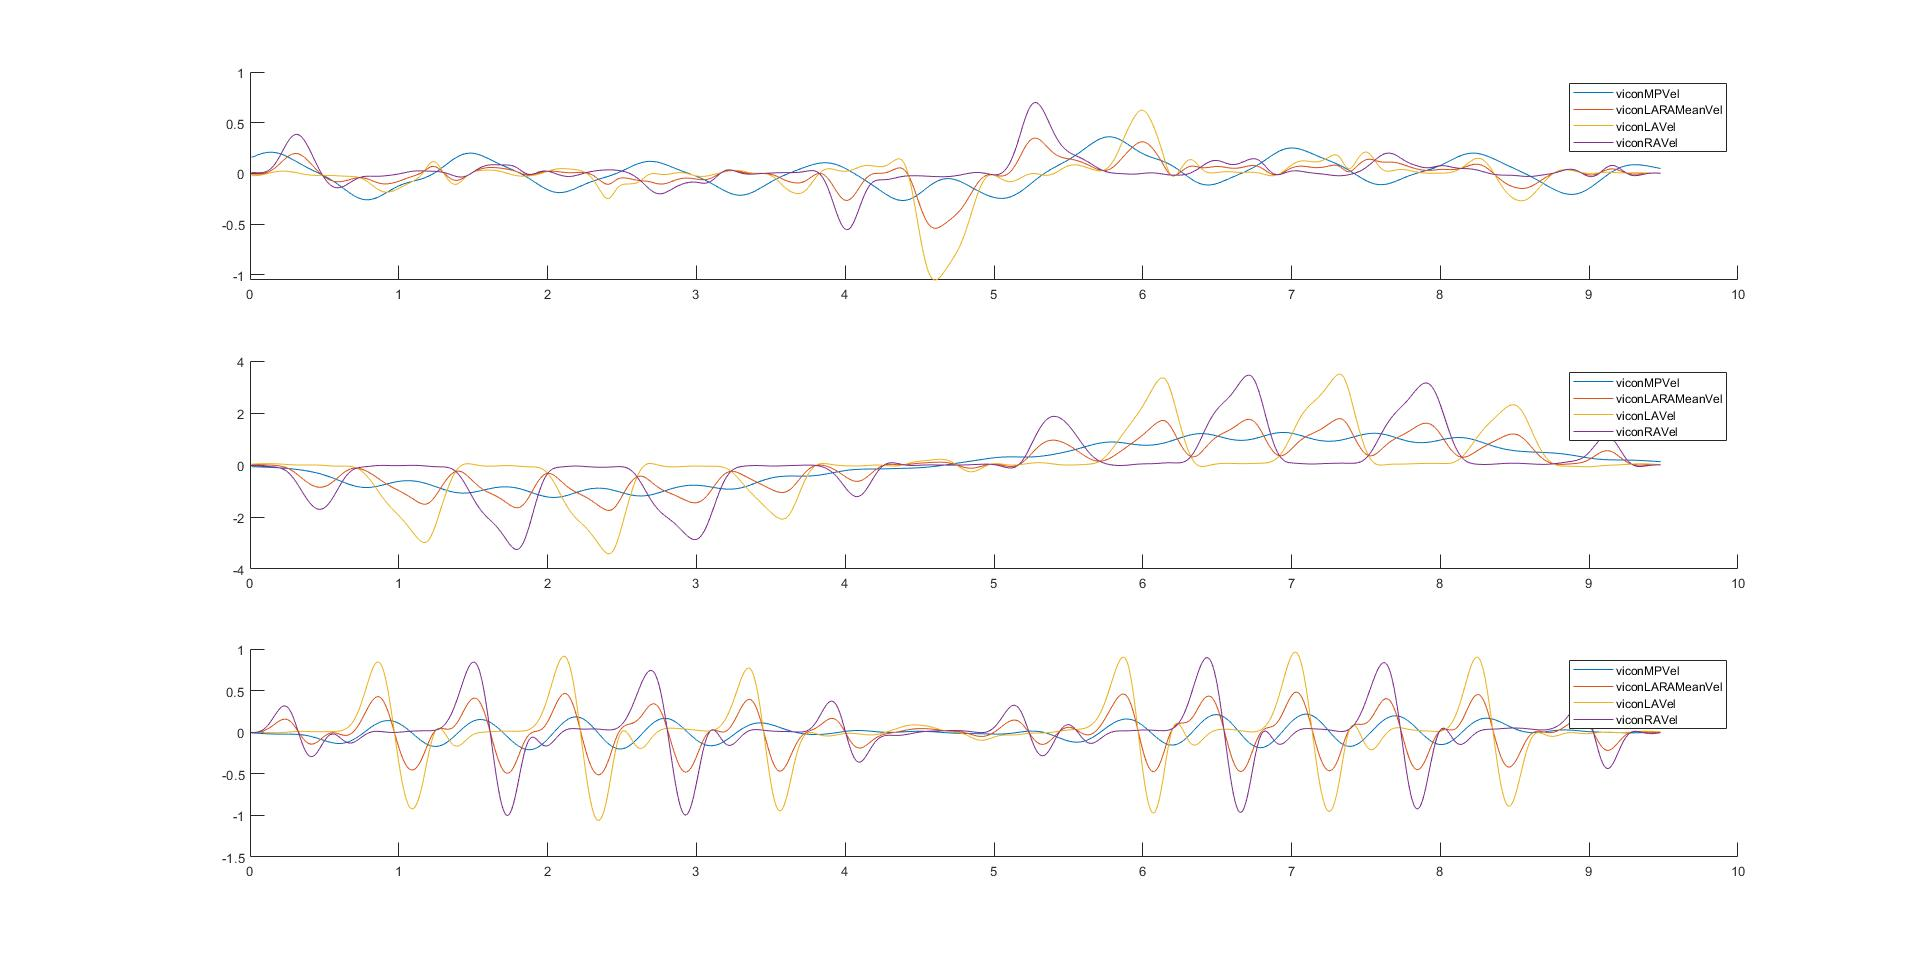
Figure: Joint velocity in a sample vicon trial.

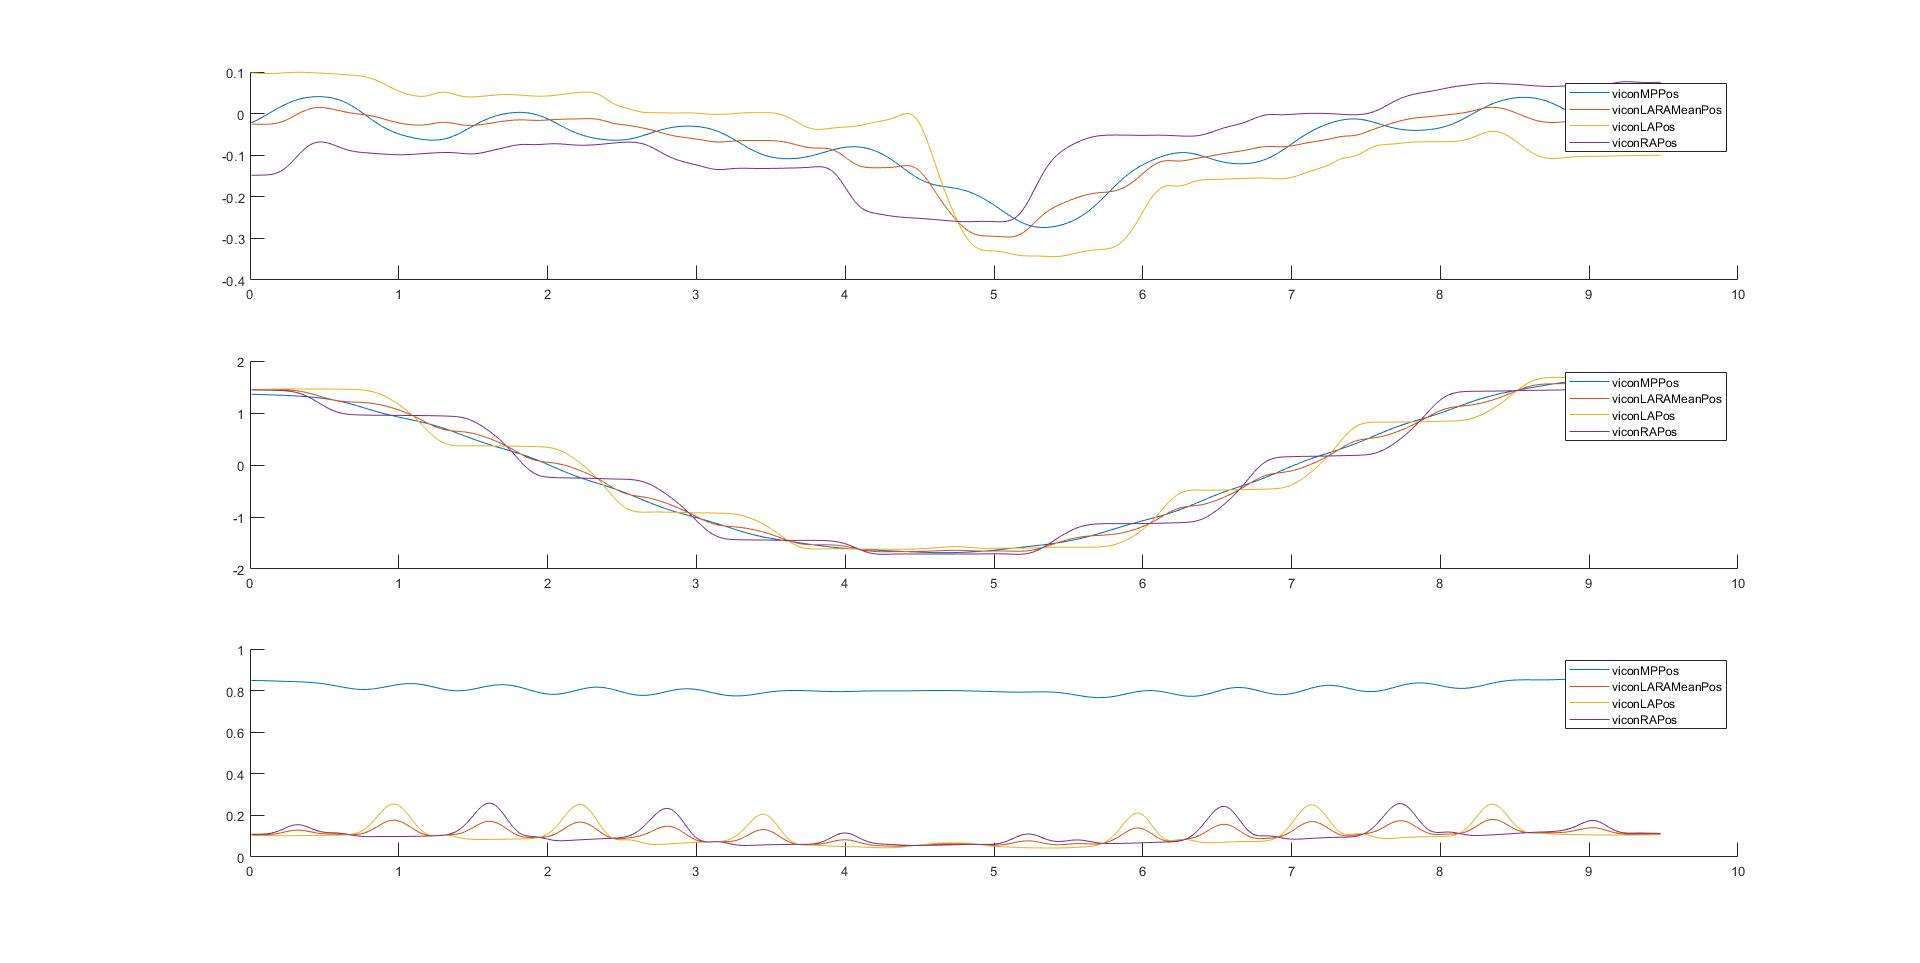
Figure: Joint positions in a sample vicon trial.

### W=inv(P) increading knee angle only

In [18]:
traces_name = {'floor': 'NS1+Aw__sOw__sIw__v+Sav01+M70+C355',
               'floor + pelv=ankle ave vel':  'NS1+Aw__sOw__sIw__v+Sav01+M71+C355',
               'floor + pelv=ankle ave pos':  'NS1+Aw__sOw__sIw__v+Sav01+M72+C355',
               'floor + pelvZ=init Zpos':     'NS1+Aw__sOw__sIw__v+Sav01+M74+C355',
               'floor + pelv=ankle and init': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C355',
               'floor + all': 'NS1+Aw__sOw__sIw__v+Sav01+M77+C355'}

In [19]:
plot_results(df_result, traces_name, 'anklePos', xTypes=xTypes)

Figure: Ankle position error of trials at different pelvis measurements for constraint W=inv(P) increasing knee angle only.

In [20]:
plot_results(df_result, traces_name, 'kneeOriY', ylabel='rmse (deg)', xTypes=xTypes)

### W=I

In [21]:
traces_name = {'floor': 'NS1+Aw__sOw__sIw__v+Sav01+M70+C353', #M + C353 and check if M70 is really working
               'floor + pelv=ankle ave vel':  'NS1+Aw__sOw__sIw__v+Sav01+M71+C353',
               'floor + pelv=ankle ave pos':  'NS1+Aw__sOw__sIw__v+Sav01+M72+C353',
               'floor + pelvZ=init Zpos':     'NS1+Aw__sOw__sIw__v+Sav01+M74+C353',
               'floor + pelv=ankle and init': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C353',
               'floor + all': 'NS1+Aw__sOw__sIw__v+Sav01+M77+C353'}

In [22]:
plot_results(df_result, traces_name, 'anklePos', xTypes=xTypes)

In [23]:
plot_results(df_result, traces_name, 'kneeOriY', ylabel='rmse (deg)', xTypes=xTypes)

## 5. Exploring W=inv(P) vs W=I vs W=inv(P) inc knee angle only

W=inv(P) gave the most inferior results for the walking trials. My analysis will focus on W=I vs W=inv(P) inc knee angle only. Assuming no foot locking, the W=I estimate sometimes ends up having large velocity on the ankle along the z axis. The velocity is not as bad as #2, and it's not like the constraint update isn't able to mitigate its effect. However, it does make the person look more robotic.

#### Why does it happen less often with W=inv(P)?
The W=P^-1 (stable config) estimate has less ankle z position change that the W=I estimate. This behavior makes sense as P has low variance along the ankle z axis. Due to this less ankle z position change, it is also less likely for the flat floor assumption (measurement update) to overcompensate the velocity correction, making the reconstruction look a lot smoother.

It can be observed from neura-S02-Trial-Walk-2-NS1+Aw__sOw__sIw__v+Sav01+M76+C355vs353-Debug.c3d that the W=inv(P) estimate is a lot smoother than W=I. Smooth changes means less overcompensation, or even if it happens, it is easier to recover from.

Note that covariance limiter during the measurement update was needed to make W=inv(P) type of constraints work. Without covariance limiter during measurement update, W=inv(P) works for all trials except the five minute walking trials where the covariance became badly conditioned (close to singular). The covariance limiter made sure that this bad conditioning will not happen.

In [24]:
traces_name = {'hacked best': 'NS1+Av__sOv__sIv__v+Sav01+M02+C175',
               'W=P^-1': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C351',
               'W=I': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C353',
               'W=P^-1 inc-knee-angle': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C355'}

In [25]:
plot_results(df_result, traces_name, 'anklePos', xTypes=xTypes)

Figure: Ankle position error of trials at different W configurations. Note that the performance of W=inv(P) inc-knee-angle for the walking trials is quite comparable if not better to the hacked best (zero pelvis covariance).

In [26]:
plot_results(df_result, traces_name, 'kneeOriY', ylabel='rmse (deg)', xTypes=xTypes)

Figure: Knee angle error of trials at different W configurations

## 6. Yaw offset from magnetic distortion

The ROM yaw offset calibration obtained from the walking trial helps fix the offset issue. However, it does not fix all the trials. The offset causes the model to look limp (no knee bending as the accelaration that was suppose to bend the knee was heading to a different direction, most likely cancelled out by the constraint update. See example from gif below:

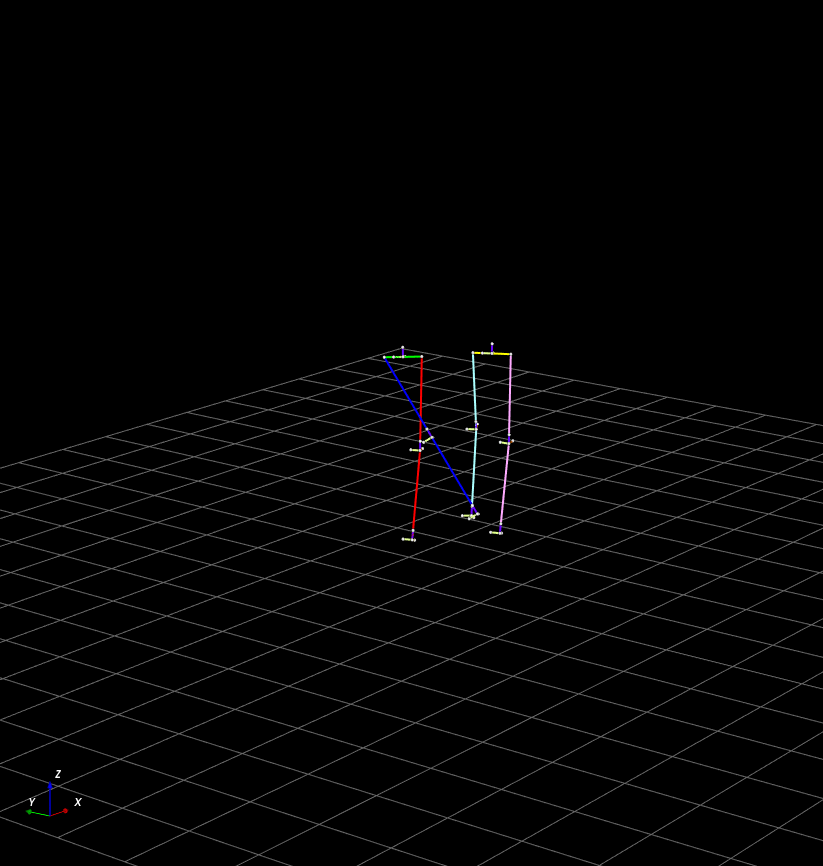

Calibration solution (need SR's opinion on this): obtain the yaw offset that produces the least difference between the acceleration from the sensors and vicon system. Use this single value offset to correct the raw sensor acceleration (one yaw offset to correct all acceleration readings for the whole trial), and then run the estimator. The result looks very promising as can be seen from the knee angle comparison below:

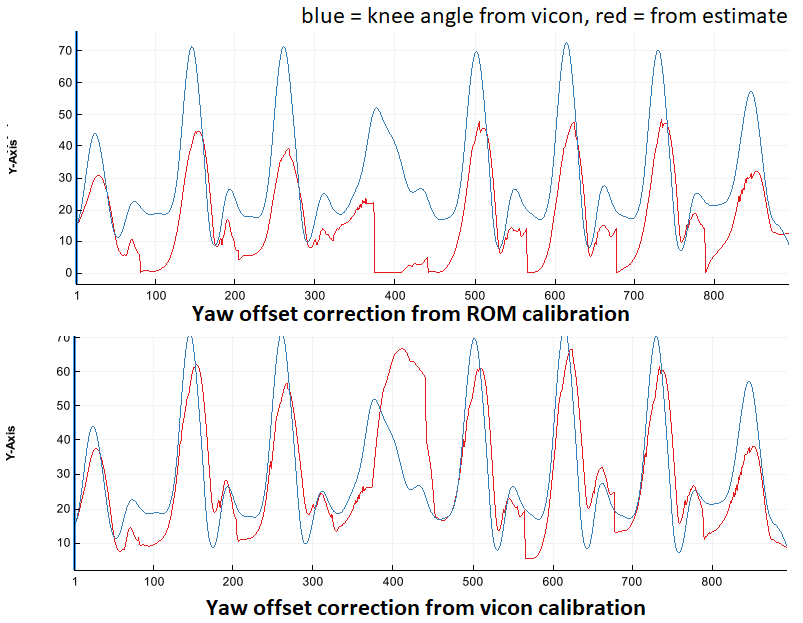
Figure: The knee angle from ROM calibration was imperfect. This lead to the knee angle not reaching the full peak (around 70 degrees). Using the vicon based calibration. The knee angle is still not perfect due to noise, but the peak reaches around 60 degrees.

I am still running the plot results....

In [27]:
traces_name = {'hacked best': 'NS1+Av__sOv__sIv__v+Sav01+M02+C175',
               'ROM calibration': 'NS1+Aw__sOw__sIw__v+Sav01+M76+C355',
               'Vicon calibration': 'NS2+Aw__sOw__sIw__v+Sav01+M76+C355'}

In [28]:
plot_results(df_result, traces_name, 'anklePos', xTypes=xTypes)

In [29]:
plot_results(df_result, traces_name, 'kneeOriY', ylabel='rmse (deg)', xTypes=xTypes)